In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [25]:
#create encoder object
le=preprocessing.LabelEncoder()
oe=preprocessing.OrdinalEncoder(categories=['zero','one','two_or_more'])

In [22]:
#loading the dataset
df=pd.read_csv('/content/Indian Airlines.csv')

In [8]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104211,104211,AirAsia,I5-1780,Bangalore,Early_Morning,one,Morning,Kolkata,Economy,6.83,13.0,5176.0
104212,104212,AirAsia,I5-1562,Bangalore,Afternoon,one,Night,Kolkata,Economy,7.50,13.0,5176.0
104213,104213,AirAsia,I5-741,Bangalore,Morning,one,Evening,Kolkata,Economy,8.17,13.0,5176.0
104214,104214,AirAsia,I5-749,Bangalore,Night,one,Early_Morning,Kolkata,Economy,8.75,13.0,5176.0


In [6]:
df.shape

(104216, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104216 entries, 0 to 104215
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        104216 non-null  int64  
 1   airline           104216 non-null  object 
 2   flight            104216 non-null  object 
 3   source_city       104216 non-null  object 
 4   departure_time    104216 non-null  object 
 5   stops             104216 non-null  object 
 6   arrival_time      104216 non-null  object 
 7   destination_city  104216 non-null  object 
 8   class             104216 non-null  object 
 9   duration          104215 non-null  float64
 10  days_left         104215 non-null  float64
 11  price             104215 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 9.5+ MB


need to deal with the number of stops using classification
<br>
<hr>
check for nulls
<br>
<hr>
perform EDA

In [23]:
df=df.drop(['Unnamed: 0'], axis=1)

In [11]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [13]:
df[df['flight'].duplicated()==1]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
19,AirAsia,I5-747,Delhi,Evening,one,Morning,Mumbai,Economy,16.33,1,5949
39,SpiceJet,SG-2976,Delhi,Evening,one,Morning,Mumbai,Economy,15.25,1,12123
57,Indigo,6E-2193,Delhi,Afternoon,one,Night,Mumbai,Economy,8.33,1,13279
64,Vistara,UK-813,Delhi,Evening,one,Night,Mumbai,Economy,26.67,1,14093
65,Vistara,UK-817,Delhi,Evening,one,Night,Mumbai,Economy,28.17,1,14093
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


no Duplicates found

In [29]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [30]:
mapping={'zero':0,'one':1,'two_or_more':2}
df['stops']=df['stops'].map(mapping)

In [31]:
df['stops'].value_counts()

,count
stops,
1,250863
0,36004
2,13286


In [32]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585


In [33]:
df.dtypes

,0
airline,object
flight,object
source_city,object
departure_time,object
stops,int64
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64


In [34]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

##InSights EDA
<hr>
<br>
The data is cleaned and standardized
<br>
the assumption for stops have been done catagorically assuming 2 or more as 2 since it wasn't clearly demarcated in the dataset
<ol>
<li>Most common airlines</li>
<li>Average flight Duration</li>
<li>Average pricing of {airline_name}</li>
</ol>

In [35]:
#most common airlines
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


based on the above findings we can safely say Vistara and Air India are the top two Most common or preffered airlines for Commute

In [36]:
df['duration'].mean() # average of all airlines

12.221020812718846

<Axes: xlabel='duration', ylabel='Count'>

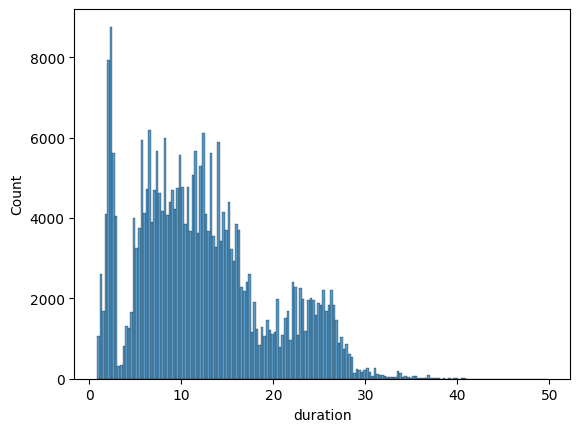

In [37]:
sns.histplot(df['duration'])

In [42]:
df1=df['duration']
df2=df['price']

<Axes: >

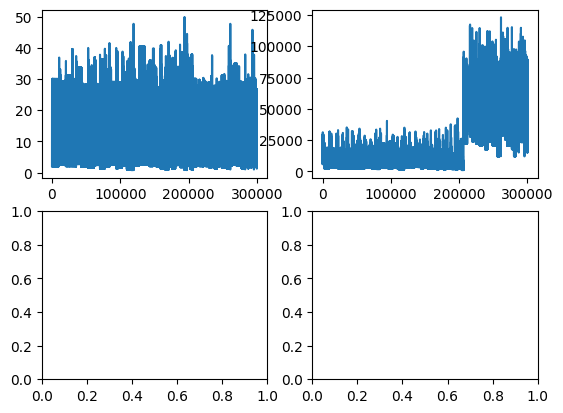

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot(ax=axes[0,0])
df2.plot(ax=axes[0,1])

In [47]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [48]:
brands=['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India']

for i in brands:
    print(i,end=' ')
    print(df[df['airline']==f'{i}']['price'].mean())

SpiceJet 6179.278881367218
AirAsia 4091.0727419555224
Vistara 30396.53630170735
GO_FIRST 5652.007595045959
Indigo 5324.216303339517
Air_India 23507.01911190229


the Average pricing of all the airlines can be reported accordingly
<br>
<ul>
<li>SpiceJet 6179.278881367218
<li>AirAsia 4091.0727419555224
<li>Vistara 30396.53630170735
<li>GO_FIRST 5652.007595045959
<li>Indigo 5324.216303339517
<li>Air_India 23507.01911190229
</ul>

In [49]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [50]:
cls=['Economy','Business']

for i in cls:
    print(i,end=' ')
    print(df[df['class']==f'{i}']['price'].mean())

Economy 6572.342383362527
Business 52540.08112357868


Average difference between economy and business can be seen here as

1.   Economy 6572.342383362527
2.   Business 52540.08112357868



In [52]:
df[(df['class'] == 'Economy') & (df['airline'] == 'Vistara')]['price'].mean()

7806.943645012636

In [53]:
for airline in brands:
    mean_price_economy = df[(df['class'] == 'Economy') & (df['airline'] == airline)]['price'].mean()

    # Mean price for Business class
    mean_price_business = df[(df['class'] == 'Business') & (df['airline'] == airline)]['price'].mean()

    # Print the results
    print(f"Average price for {airline} (Economy): {mean_price_economy}")
    print(f"Average price for {airline} (Business): {mean_price_business}")
    print("-" * 50)

Average price for SpiceJet (Economy): 6179.278881367218
Average price for SpiceJet (Business): nan
--------------------------------------------------
Average price for AirAsia (Economy): 4091.0727419555224
Average price for AirAsia (Business): nan
--------------------------------------------------
Average price for Vistara (Economy): 7806.943645012636
Average price for Vistara (Business): 55477.027777319316
--------------------------------------------------
Average price for GO_FIRST (Economy): 5652.007595045959
Average price for GO_FIRST (Business): nan
--------------------------------------------------
Average price for Indigo (Economy): 5324.216303339517
Average price for Indigo (Business): nan
--------------------------------------------------
Average price for Air_India (Economy): 7313.682168604409
Average price for Air_India (Business): 47131.03921211016
--------------------------------------------------
